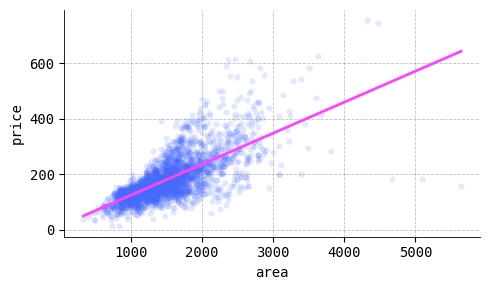

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib as mpl
#import matplotlib_inline.backend_inline
import seaborn as sns
import scipy as sp
from itertools import product
import warnings
plt.style.use('./aux-files/custom_style_light.mplstyle')
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')
blue = '#486AFB'
magenta = '#FD46FC'

# linear regression example begins below

# import linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression

# import data
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/data-3-1.csv'
df = pd.read_csv(url, usecols=['area', 'price'])

# pull out the 'area' column and 'price column from the data and convert them to numpy arrays
X = df['area'].to_numpy().reshape(-1, 1)
y = df['price'].to_numpy()

# instantiate a linear regression model
model = LinearRegression()

# train the model
model.fit(X=X, y=y)

# get the learned parameters
beta, beta_0 = model.coef_, model.intercept_

# build a grid for the regression line
grid = np.linspace(X.min(), X.max())

# plot the regression line
plt.plot(grid, beta * grid + beta_0, color=magenta)

# plot the data
plt.scatter(x=X, y=y, alpha=0.15)

plt.xlabel('area')
plt.ylabel('price')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

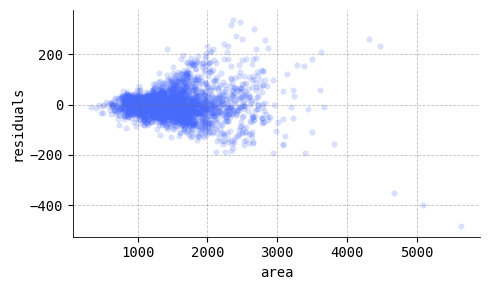

In [287]:
# get the predictions
y_hat = model.predict(X=X)

# get the residuals
resid = y - y_hat

# plot the residuals vs. area
plt.scatter(x=X, y=resid, alpha=0.20)

plt.xlabel('area')
plt.ylabel('residuals')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

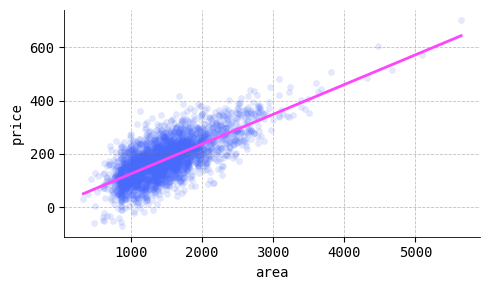

In [288]:
# import statsmodels
import statsmodels.formula.api as smf

# instantiate and train a linear regression model from statsmodels
model = smf.ols(formula='price ~ area', data=df).fit()

# get the learned standard deviation
sigma = np.sqrt(model.scale)

# generate the dataset
np.random.seed(42)
y_gen = sp.stats.norm(loc=y_hat, scale=sigma).rvs(2930)
df_gen = pd.DataFrame({'area': df['area'], 'price': y_gen})

# plot the dataset
df_gen.plot(kind='scatter', x='area', y='price', alpha=0.15)

# plot the original regression line
plt.plot(grid, beta_0 + beta * grid, color=magenta)

plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

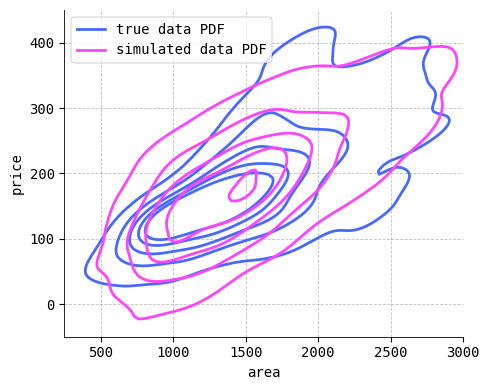

In [289]:
df['indicator'] = 'true data PDF'
df_gen['indicator'] = 'simulated data PDF'
df_combined = pd.concat(objs=[df, df_gen], axis=0)

g = sns.kdeplot(data=df_combined, x='area', y='price', hue='indicator', levels=6)
g.get_legend().set_title(None)
sns.move_legend(obj=g, loc='upper left')
plt.xlim(250, 3000)
plt.ylim(-50, 450)
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()

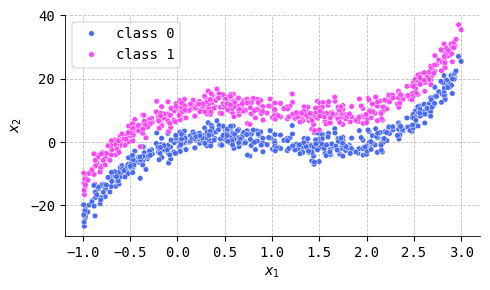

In [290]:
# import the data
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/ch10-book-data-01.csv'
df = pd.read_csv(url)
#df = pd.read_csv('./aux-files/hard-data.csv')

# plot the data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, k2 in zip(g.legend_.texts, new_labels):
    t.set_text(k2)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

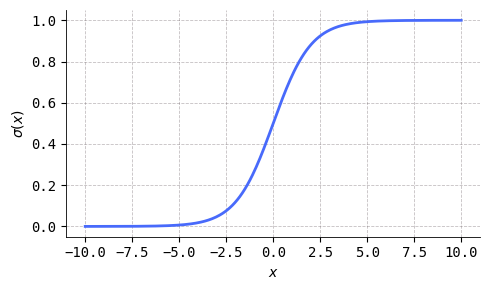

In [291]:
import torch
import torch.nn.functional as F

grid = torch.linspace(start=-10, end=10, steps=300)
plt.plot(grid, F.sigmoid(grid))
plt.gcf().set_size_inches(w=5, h=3)
plt.xlabel('$x$')
plt.ylabel('$\sigma(x)$')
plt.tight_layout()

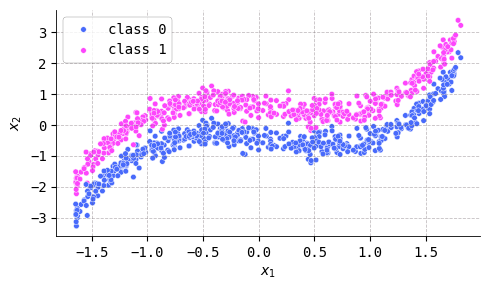

In [292]:
# import scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# convert the data to numpy arrays
X = df[['x_1', 'x_2']].to_numpy()
y = df['y'].to_numpy()

# scale the input data
ss = StandardScaler()
X = ss.fit_transform(X=X)

# replaced the columns of the dataframe with the transformed data
df['x_1'] = X[:, 0]
df['x_2'] = X[:, 1]

# plot the scaled data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, k2 in zip(g.legend_.texts, new_labels):
    t.set_text(k2)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

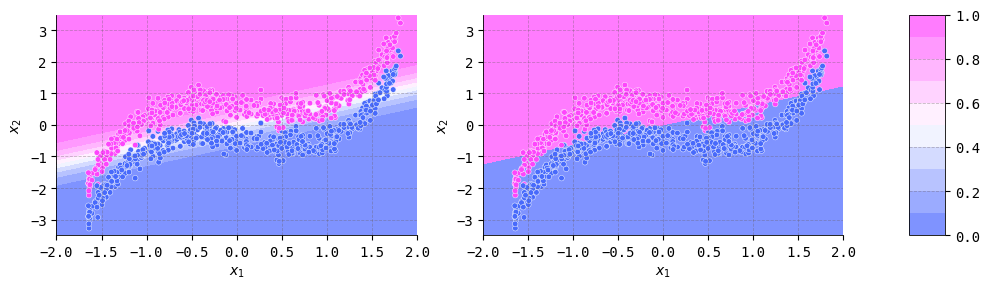

In [293]:
# import logistic regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# instantiate a logistic regression model
model = LogisticRegression()

# train the model
model.fit(X=X, y=y)

# get the grid for the contour plot
resolution = 1000
x_1 = (-2, 2)
x_2 = (-3.5, 3.5)
x1_grid, x2_grid = torch.meshgrid(torch.linspace(*x_1, resolution), torch.linspace(*x_2, resolution))
grid = torch.column_stack((x1_grid.reshape((resolution ** 2, -1)), x2_grid.reshape((resolution ** 2, -1))))

# define colormaps for the contour plots
desat_blue = '#7F93FF'
desat_magenta = '#FF7CFE'
diverging_cmap = clr.LinearSegmentedColormap.from_list(name='diverging', colors=[desat_blue, 'white', desat_magenta], N=10)
binary_cmap = clr.LinearSegmentedColormap.from_list(name='binary', colors=[desat_blue, desat_magenta], N=2)

_, axes = plt.subplots(ncols=3, figsize=(10, 3), width_ratios=[10, 10, 1])

# generate the contour plots
z = model.predict_proba(grid)[:, 1]
z = z.reshape(resolution, resolution)
axes[0].contourf(x1_grid, x2_grid, z, cmap=diverging_cmap, levels=diverging_cmap.N)
z = model.predict(grid)
z = z.reshape(resolution, resolution)
axes[1].contourf(x1_grid, x2_grid, z, cmap=binary_cmap, levels=binary_cmap.N)

# create the colorbar
plt.colorbar(mpl.cm.ScalarMappable(cmap=diverging_cmap), cax=axes[2], orientation='vertical')

# plot the data
for axis in axes[:-1]:
    sns.scatterplot(data=df, x='x_1', y='x_2', hue='y', ax=axis, legend=False)
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')

plt.tight_layout()

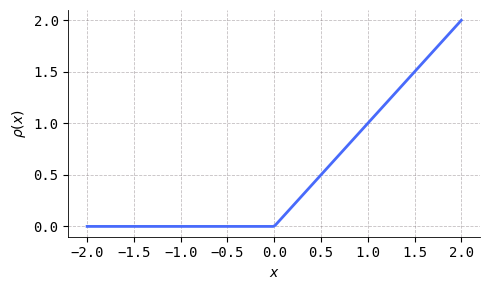

In [294]:
relu_grid = torch.linspace(start=-2, end=2, steps=200)
plt.plot(relu_grid, F.relu(relu_grid))
plt.gcf().set_size_inches(w=5, h=3)
plt.xlabel('$x$')
plt.ylabel('$\\rho(x)$')
plt.tight_layout()

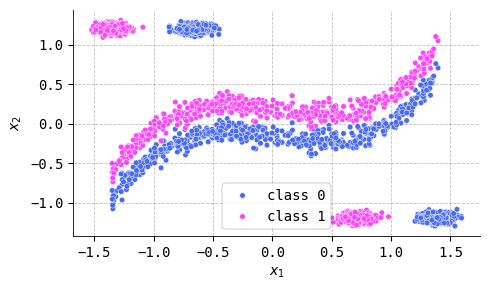

In [295]:
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/ch10-book-data-03.csv'
df = pd.read_csv(url)

# convert the data to numpy arrays
X = df[['x_1', 'x_2']].to_numpy()
y = df['y'].to_numpy()

# scale the input data
ss = StandardScaler()
X = ss.fit_transform(X=X)

# replaced the columns of the dataframe with the transformed data
df['x_1'] = X[:, 0]
df['x_2'] = X[:, 1]

# convert the data to torch tensors
X = torch.tensor(data=X, dtype=torch.float32)
y = torch.tensor(data=y, dtype=torch.float32)

# plot the data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, k2 in zip(g.legend_.texts, new_labels):
    t.set_text(k2)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

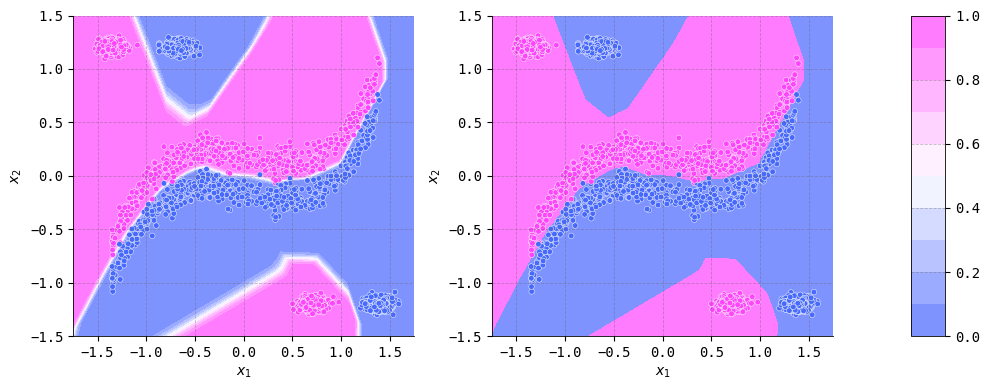

In [296]:
import torch.nn as nn

# define the neural network model architecture
torch.manual_seed(42)
k1 = 8 # width of first hidden layer
k2 = 8 # width of second hidden layer
k3 = 4 # width of third hidden layer

class NeuralNetwork(nn.Module):
    def __init__(self, input_dimension):
        super().__init__()

        # three hidden layers...
        self.hidden1_linear = nn.Linear(in_features=input_dimension, out_features=k1)
        self.hidden1_act = nn.ReLU()
        self.hidden2_linear = nn.Linear(in_features=k1, out_features=k2)
        self.hidden2_act = nn.ReLU()
        self.hidden3_linear = nn.Linear(in_features=k2, out_features=k3)
        self.hidden3_act = nn.ReLU()
        
        # ...and one output layer
        self.output_linear = nn.Linear(in_features=k3, out_features=1)
        self.output_act = nn.Sigmoid()

    def forward(self, X):
        X = self.hidden1_act(self.hidden1_linear(X))
        hidden_output_1 = X
        X = self.hidden2_act(self.hidden2_linear(X))
        hidden_output_2 = X
        X = self.hidden3_act(self.hidden3_linear(X))
        hidden_output_3 = X
        X = self.output_act(self.output_linear(X))

        return X, hidden_output_1, hidden_output_2, hidden_output_3
    
model = NeuralNetwork(input_dimension=2)

# define the loss function and optimizer
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=5e-1)

# train the model
num_epochs = 4000
for _ in range(num_epochs):
    optimizer.zero_grad()
    y_hat = model(X)[0]
    loss = loss_fn(y_hat.squeeze(), y)
    loss.backward()
    optimizer.step()

_, axes = plt.subplots(ncols=3, figsize=(10, 4), width_ratios=[10, 10, 1])

# get the grid for the contour plot
resolution = 1000
x1_grid = torch.linspace(-1.75, 1.75, resolution)
x2_grid = torch.linspace(-1.5, 1.5, resolution)
x1_grid, x2_grid = torch.meshgrid(x1_grid, x2_grid)
grid = torch.column_stack((x1_grid.reshape((resolution ** 2, -1)), x2_grid.reshape((resolution ** 2, -1))))

# generate the contour plots
grid_outputs = model(grid)
z = grid_outputs[0].detach()
z = z.reshape(resolution, resolution)
axes[0].contourf(x1_grid, x2_grid, z, cmap=diverging_cmap, levels=diverging_cmap.N)
z = grid_outputs[0] >= 0.5
z = z.reshape(resolution, resolution)
axes[1].contourf(x1_grid, x2_grid, z, cmap=binary_cmap, levels=binary_cmap.N)

# create the colorbar
plt.colorbar(mpl.cm.ScalarMappable(cmap=diverging_cmap), cax=axes[2], orientation='vertical')

# plot the data
for axis in axes[:-1]:
    sns.scatterplot(data=df, x='x_1', y='x_2', hue='y', ax=axis, legend=False)
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')

plt.tight_layout()

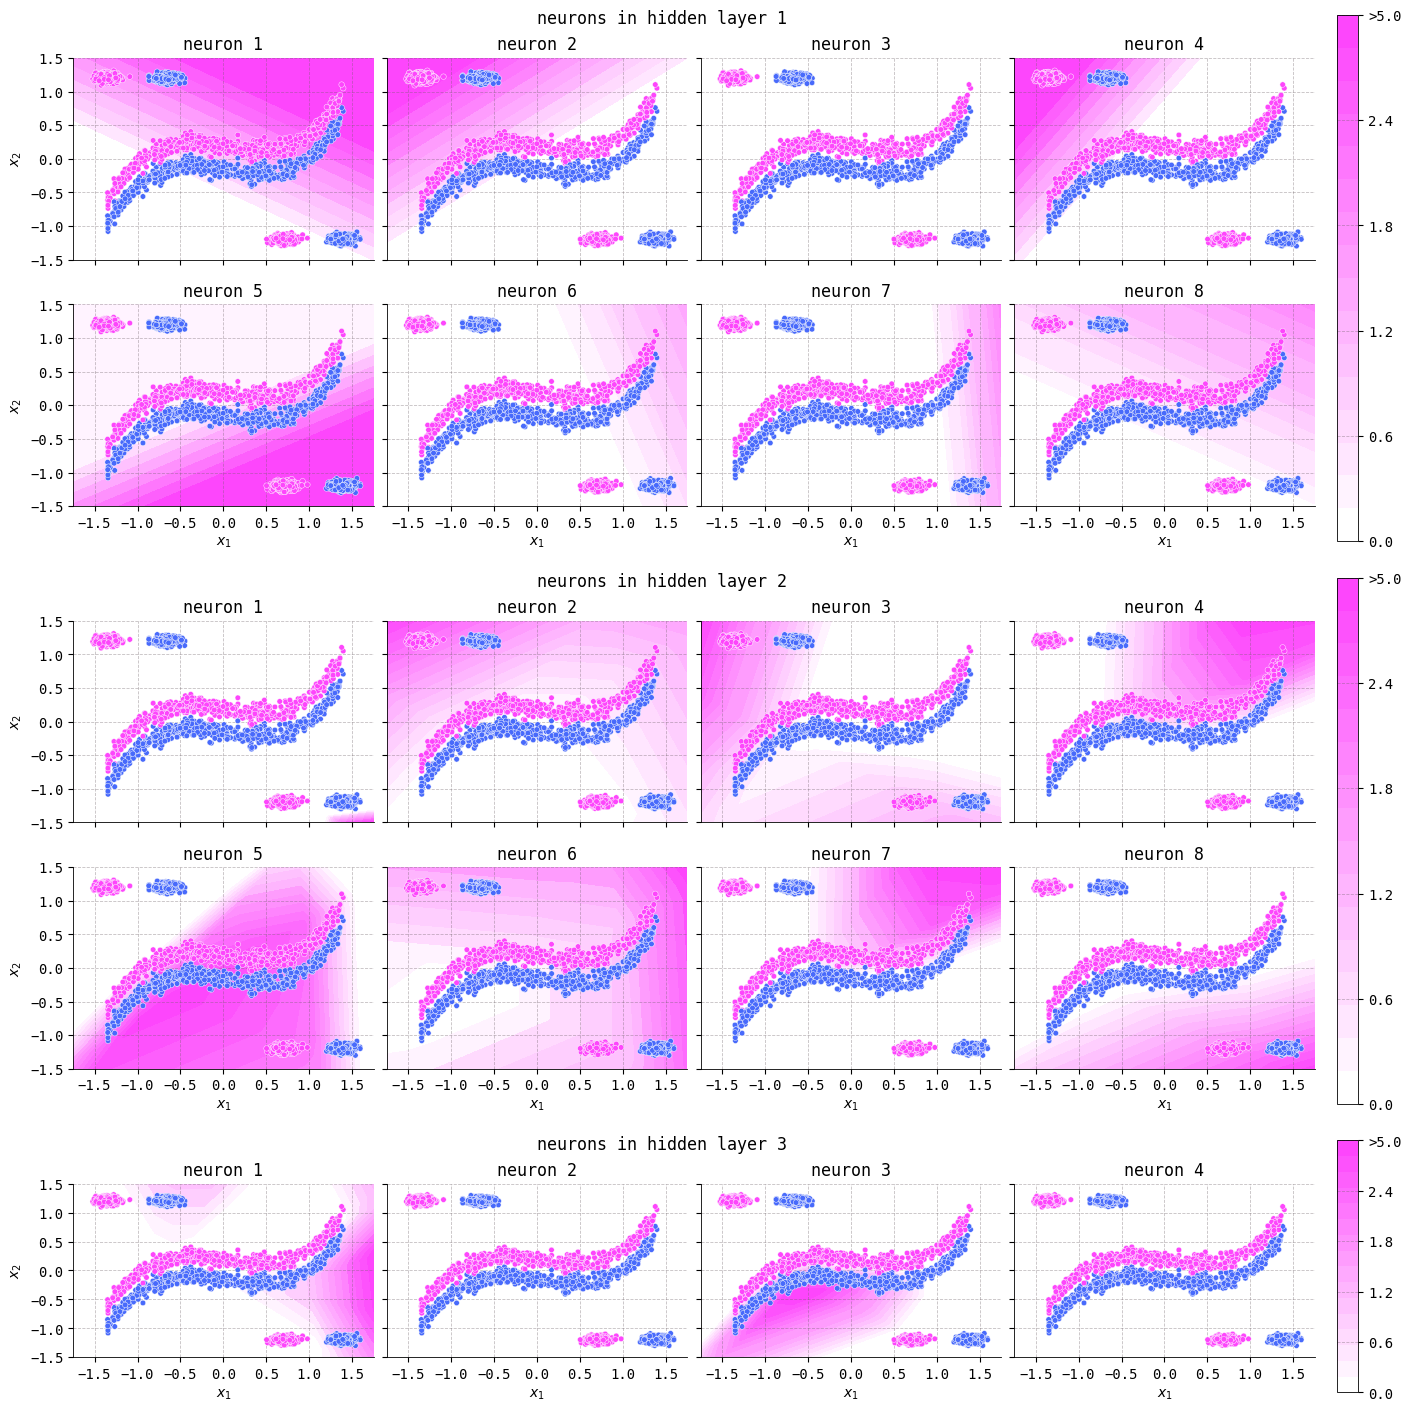

In [297]:
fig = plt.figure(constrained_layout=True, figsize=(14, 14))
subfigs = fig.subfigures(ncols=2, nrows=3, hspace=0.03, height_ratios=[2, 2, 1], width_ratios=[18, 1])

light_cmap = clr.LinearSegmentedColormap.from_list(name='light', colors=['white', magenta], N=16)

# hidden layer 1, with 8 neurons
subfig = subfigs[0, 0]
subfig.suptitle(f'neurons in hidden layer 1')
axes = subfig.subplots(nrows=2, ncols=4, sharex=True, sharey=True)
    
for j, axis in enumerate(axes.flatten()):
    z = grid_outputs[1][:, j].detach().numpy()
    z = z.reshape(resolution, resolution)
    contour = axis.contourf(x1_grid, x2_grid, z, cmap=light_cmap, levels=light_cmap.N, vmin=0, vmax=3)
    
    sns.scatterplot(data=df, x='x_1', y='x_2', hue='y', ax=axis, legend=False, zorder=3)
    axis.set_title(f'neuron {j + 1}')
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')

# hidden layer 2, with 4 neurons
subfig = subfigs[1, 0]
subfig.suptitle(f'neurons in hidden layer 2')
axes = subfig.subplots(nrows=2, ncols=4, sharex=True, sharey=True)

for j, axis in enumerate(axes.flatten()):
    z = grid_outputs[2][:, j].detach().numpy()
    z = z.reshape(resolution, resolution)
    axis.contourf(x1_grid, x2_grid, z, cmap=light_cmap, levels=light_cmap.N, vmin=0, vamx=3)

    sns.scatterplot(data=df, x='x_1', y='x_2', hue='y', ax=axis, legend=False, zorder=3)
    axis.set_title(f'neuron {j + 1}')
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')

subfig = subfigs[2, 0]
subfig.suptitle('neurons in hidden layer 3')
axes = subfig.subplots(nrows=1, ncols=4, sharex=True, sharey=True)

for j, axis in enumerate(axes.flatten()):
    z = grid_outputs[3][:, j].detach().numpy()
    z = z.reshape(resolution, resolution)
    axis.contourf(x1_grid, x2_grid, z, cmap=light_cmap, levels=light_cmap.N, vmin=0, vamx=10)

    sns.scatterplot(data=df, x='x_1', y='x_2', hue='y', ax=axis, legend=False, zorder=3)
    axis.set_title(f'neuron {j + 1}')
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')

# plot the colorbars
for subfig in subfigs[:, 1]:
    axis = subfig.subplots()
    cbar = subfig.colorbar(mpl.cm.ScalarMappable(cmap=light_cmap), cax=axis, orientation='vertical')
    cbar.set_ticklabels([round(3 / 5 * k, 1) for k in range(5)] + ['>5.0'])

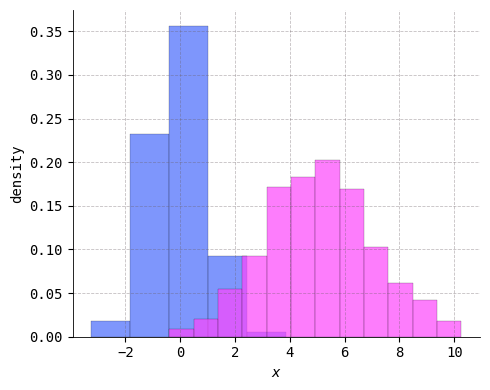

In [298]:
np.random.seed(42)
class_0 = sp.stats.norm(loc=0, scale=1).rvs(size=512)
class_1 = sp.stats.norm(loc=5, scale=2).rvs(size=512)

X = np.concatenate((class_0, class_1))
X = X.reshape(-1, 1)

plt.hist(x=class_0, alpha=0.7, ec='black', bins=5, density=True)
plt.hist(x=class_1, alpha=0.7, ec='black', bins=12, density=True)
plt.xlabel('$x$')
plt.ylabel('density')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()

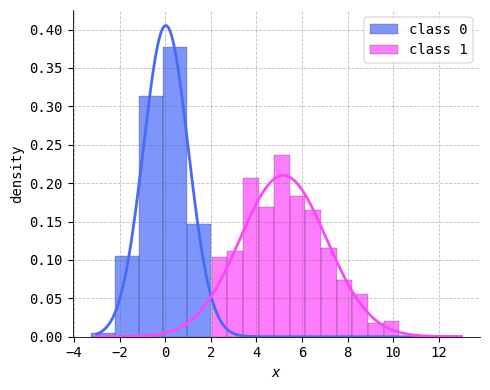

In [299]:
# import gaussian mixture model from scikit-learn
from sklearn.mixture import GaussianMixture

# import data and convert to numpy array
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/ch10-book-data-02.csv'
df = pd.read_csv(url)
X = df['x'].to_numpy().reshape(-1, 1)

# instantiate the model, fit it to the data, predict components
gmm = GaussianMixture(n_components=2, random_state=42)
z_hat = gmm.fit_predict(X=X)

# cluster the data based on predicted components
class_0 = X[z_hat == 0]
class_1 = X[z_hat == 1]

# pull out the learned parameters
means = gmm.means_
std = np.sqrt(gmm.covariances_)

# define gaussian random variables based on learned parameters
comp_0 = sp.stats.norm(loc=means[0][0], scale=std[0][0][0])
comp_1 = sp.stats.norm(loc=means[1][0], scale=std[1][0][0])

# plot the gaussian density curves
grid = np.linspace(-3, 13, num=300)
plt.plot(grid, comp_0.pdf(grid))
plt.plot(grid, comp_1.pdf(grid))

# plot the data with component labels
plt.hist(x=class_0, alpha=0.7, ec='black', bins=5, density=True, color=blue, label='class 0')
plt.hist(x=class_1, alpha=0.7, ec='black', bins=12, density=True, color=magenta, label='class 1')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('density')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()